In [1]:
import numpy as np
import astroplan
from astroplan.plots import plot_sky
from astroplan import plots, Observer, FixedTarget
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_moon


In [2]:
astropy.__version__

'5.3.4'

In [3]:
astroplan.download_IERS_A()

In [4]:
custom_cycler=[]
colors=[]
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)

In [5]:
observer = astroplan.Observer.at_site('irtf')

In [6]:
today = Time('2025-09-12 04:45:00', scale='utc') #18:45 HST 

In [7]:
pre_twi12deg = observer.sun_set_time(today, horizon=-12*u.degree)
print('12 deg env twilight', pre_twi12deg.iso)
pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg env twilight', pre_twi15deg.iso)
pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)
twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)
twi12deg = observer.twilight_morning_nautical(today)
twi6deg  = observer.twilight_morning_civil(today)
print('12 deg morn twilight', twi12deg.iso)
print('6 deg morn twilight', twi6deg.iso)



handoff = Time('2025-09-12 04:45:00', scale='utc') # 18:45 HST
night_end = Time('2025-09-12 08:45:00', scale='utc') # 22:45 HST

12 deg env twilight 2025-09-12 05:15:25.788
15 deg env twilight 2025-09-12 05:28:21.310
18 deg eve twilight 2025-09-12 05:41:19.619
18 deg morn twilight 2025-09-12 14:55:07.371
15 deg morn twilight 2025-09-12 15:08:05.897
12 deg morn twilight 2025-09-12 15:21:01.662
6 deg morn twilight 2025-09-12 15:46:45.969


In [8]:
#NIR Standards

#for SN 2023ixf
HIP71172   = astroplan.FixedTarget(coord=SkyCoord('14:33:23.46', '+44:19:53.8', unit=(u.hourangle, u.degree)),
                                      name='HIP71172') #V~9.3 
HIP65280   = astroplan.FixedTarget(coord=SkyCoord('13:22:45.12', '+44:42:54.0', unit=(u.hourangle, u.degree)),
                                      name='HIP71172') #V~8.3
 
#for SN 2023mut 
HIP22923   = astroplan.FixedTarget(coord=SkyCoord('04:55:58.36',  '+05:23:56.6', unit=(u.hourangle, u.degree)),
                                      name='HIP22923') #V~6.5 
HIP24266   = astroplan.FixedTarget(coord=SkyCoord('05:12:29.12',  '-00:30:34.3', unit=(u.hourangle, u.degree)),
                                      name='HIP24266') #V~8.9

#for SN 2023zcu
HIP28520   = astroplan.FixedTarget(coord=SkyCoord('06:01:13.10',  '-25:25:03.9', unit=(u.hourangle, u.degree)),
                                      name='HIP28520') #V~6
HIP28960   = astroplan.FixedTarget(coord=SkyCoord('06:06:42.85',  '-22:24:10.7', unit=(u.hourangle, u.degree)),
                                      name='HIP28960') #V~8.7 
HIP29194   = astroplan.FixedTarget(coord=SkyCoord('06:09:29.28', '-24:14:58.8',  unit=(u.hourangle, u.degree)),
                                      name='HIP29194') #V~8.4

#for SN 2024bch
HIP53735   = astroplan.FixedTarget(coord=SkyCoord('10:59:40.21',  '+45:47:19.0', unit=(u.hourangle, u.degree)),
                                      name='HIP53735') #V~8.9
HIP56147   = astroplan.FixedTarget(coord=SkyCoord('11:30:29.83',  '+48:56:08.7', unit=(u.hourangle, u.degree)),
                                      name='HIP56147') #V~7.4  

#for SN 2024gy
HIP62745   = astroplan.FixedTarget(coord=SkyCoord('12:51:23.33',  '+12:22:21.9', unit=(u.hourangle, u.degree)),
                                      name='HIP62745') #V~8.9
HIP56736   = astroplan.FixedTarget(coord=SkyCoord('11:37:57.82', '+15:46:36.9',  unit=(u.hourangle, u.degree)),
                                      name='HIP56736') #V~8.8

#for SN 2023plg
HIP35345   = astroplan.FixedTarget(coord=SkyCoord('07:18:04.09',  '+30:57:21.1', unit=(u.hourangle, u.degree)),
                                      name='HIP35345') #V~6.2
HIP36078   = astroplan.FixedTarget(coord=SkyCoord('07:26:02.42',  '+14:06:10.7', unit=(u.hourangle, u.degree)),
                                      name='HIP36078') #V~7.4
HIP29909   = astroplan.FixedTarget(coord=SkyCoord('06:17:50.87',  '+19:27:25.9',  unit=(u.hourangle, u.degree)),
                                      name='HIP29909') #V~7.5

#for SN 2023ufx
HIP38722   = astroplan.FixedTarget(coord=SkyCoord('07:55:39.89',  '+19:53:02.2', unit=(u.hourangle, u.degree)),
                                      name='HIP38722') #V~5.4
HIP43018   = astroplan.FixedTarget(coord=SkyCoord('08:45:59.29', '+13:15:49.6', unit=(u.hourangle, u.degree)),
                                      name='HIP43018') #V~8.7
HIP36078   = astroplan.FixedTarget(coord=SkyCoord('07:26:02.42',  '+14:06:10.7', unit=(u.hourangle, u.degree)),
                                      name='HIP36078') #V~7.4

#for SN 2024cld
HIP80974   = astroplan.FixedTarget(coord=SkyCoord('16:32:08.10', '-12:25:53.8', unit=(u.hourangle, u.degree)),
                                      name='HIP80974') #V~7
HIP73939   = astroplan.FixedTarget(coord=SkyCoord('15:06:34.23',  '-12:54:25.2', unit=(u.hourangle, u.degree)),
                                      name='HIP73939') #V~7.5
HIP73087   = astroplan.FixedTarget(coord=SkyCoord('14:56:13.23',  '+14:26:46.6', unit=(u.hourangle, u.degree)),
                                      name='HIP73087') #V~5.9

#for SN 2023fyq
HIP62745   = astroplan.FixedTarget(coord=SkyCoord('12:51:23.33',  '+12:22:21.9',  unit=(u.hourangle, u.degree)),
                                      name='HIP62745') #V~8.9
HIP61138   = astroplan.FixedTarget(coord=SkyCoord('12:31:41.30', '+22:07:24.4',  unit=(u.hourangle, u.degree)),
                                      name='HIP61138') #V~8.8

#for SN 2024inv 
HIP56736   = astroplan.FixedTarget(coord=SkyCoord('11:37:57.81', '+15 46 36.85',  unit=(u.hourangle, u.degree)),
                                      name='HIP56736') #V~8.8 

#for SN 2024kce
HIP61960   = astroplan.FixedTarget(coord=SkyCoord('12 41 53.06', '+10 14 08.25',  unit=(u.hourangle, u.degree)),
                                      name='HIP61960') #V~4.9 


#for SN 2024ahv
HIP79332   = astroplan.FixedTarget(coord=SkyCoord('16 11 28.74', '+16 39 56.49',  unit=(u.hourangle, u.degree)),
                                      name='HIP79332') #V~6.1 

#for SN 2024gqd
HIP87108   = astroplan.FixedTarget(coord=SkyCoord('17 47 53.56', '+02 42 26.2',  unit=(u.hourangle, u.degree)),
                                      name='HIP96753') #V~3.8

#for SN 2024itg 


In [9]:
stds_nir = [HIP71172, HIP65280, HIP22923, HIP24266, HIP28960, HIP29194, HIP53735, HIP56147, HIP62745, HIP56736, HIP36078, HIP29909, HIP43018, HIP36078, HIP80974, HIP73939, HIP61138, HIP73087, HIP56736, HIP61960, HIP79332]

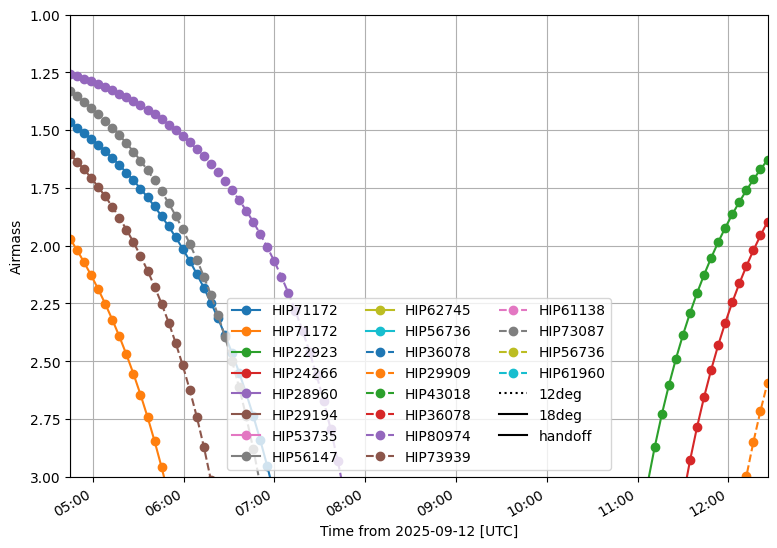

In [10]:
from astropy.utils.iers import conf
conf.auto_max_age = None
time = today+np.linspace(0, 0.32, 100)
plt.figure(figsize=(9,6))
for istd_nir, istyle in zip(stds_nir, custom_cycler):
    plots.plot_airmass(istd_nir, observer, time, style_kwargs=istyle)
plt.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(twi18deg.plot_date, label='18deg', color='k')
plt.axvline(handoff.plot_date, label='handoff', color='k')
#plt.axvline(handoff.plot_date, label='end', color='green')
plt.legend(ncol=3, loc='lower center')
plt.grid()

In [11]:
chosen_stds = [HIP22923, HIP29194, HIP56736, HIP36078, HIP36078, HIP65280, HIP80974, HIP61138]

In [123]:
sn2019uo    = astroplan.FixedTarget(coord=SkyCoord('12:02:36.56', '+41:03:42.3', unit=(u.hourangle, u.degree)),
                                  name='2019uo')
sn2017ivh    = astroplan.FixedTarget(coord=SkyCoord('13:39:36.25', '-11:28:55.9', unit=(u.hourangle, u.degree)),
                                  name='2017ivh')
sn2017eaw    = astroplan.FixedTarget(coord=SkyCoord('20:34:44.24', '+60:11:35.9', unit=(u.hourangle, u.degree)),
                                  name='2017eaw')
sn2017ivv    = astroplan.FixedTarget(coord=SkyCoord('20:28:49.84', '-04:22:57.3', unit=(u.hourangle, u.degree)),
                                  name='2017ivv')
sn2018gj    = astroplan.FixedTarget(coord=SkyCoord('16:32:02.40', '+78:12:41.1', unit=(u.hourangle, u.degree)),
                                  name='2018gj')
sn2018aoq    = astroplan.FixedTarget(coord=SkyCoord('12:10:38.19', '+39:23:47.0', unit=(u.hourangle, u.degree)),
                                  name='2018aoq')
sn2018las    = astroplan.FixedTarget(coord=SkyCoord('10:59:52.23', '+19:47:41.8', unit=(u.hourangle, u.degree)),
                                  name='2018las')
sn2018aoz  = astroplan.FixedTarget(coord=SkyCoord('11:51:01.79', '-28:44:38.4', unit=(u.hourangle, u.degree)),
                                   name='2018aoz')
sn2018bsz = astroplan.FixedTarget(coord=SkyCoord('16:09:39.20', '-32:03:45.2', unit=(u.hourangle, u.degree)),
                                   name='2018bsz')
sn2018hmx = astroplan.FixedTarget(coord=SkyCoord('08:33:39.34', '+55:35:53.0', unit=(u.hourangle, u.degree)),
                                   name='2018hmx')
sn2018hna = astroplan.FixedTarget(coord=SkyCoord('12:26:12.05', '+58:18:51.1', unit=(u.hourangle, u.degree)),
                                   name='2018hna')
sn2018bwr = astroplan.FixedTarget(coord=SkyCoord('15:28:26.17', '+08:48:22.2', unit=(u.hourangle, u.degree)),
                                   name='2018bwr')
sn2017cjb = astroplan.FixedTarget(coord=SkyCoord('12:53:50.45', '+09:42:17.7', unit=(u.hourangle, u.degree)),
                                   name='2017cjb')
sn2017gmr = astroplan.FixedTarget(coord=SkyCoord('02:35:30.15', '-09:21:15.0', unit=(u.hourangle, u.degree)),
                                   name='2017gmr')
sn2018hhn = astroplan.FixedTarget(coord=SkyCoord('22:52:32.06', '+11:40:26.7', unit=(u.hourangle, u.degree)),
                                   name='2018hhn')
sn2018giu = astroplan.FixedTarget(coord=SkyCoord('20:27:49.22', '+09:54:51.9', unit=(u.hourangle, u.degree)),
                                   name='2018giu')
sn2018eog = astroplan.FixedTarget(coord=SkyCoord('20:28:12.03', '-03:08:11.2', unit=(u.hourangle, u.degree)),
                                   name='2018eog')
sn2019cxu = astroplan.FixedTarget(coord=SkyCoord('13:05:30.09', '-08:45:52.7', unit=(u.hourangle, u.degree)),
                                   name='2019cxu')
sn2020jfv = astroplan.FixedTarget(coord=SkyCoord('23:06:35.75', '+00:36:43.6', unit=(u.hourangle, u.degree)),
                                   name='2020jfv')
sn2021aatd = astroplan.FixedTarget(coord=SkyCoord('00:59:04.17', '-00:12:12.2', unit=(u.hourangle, u.degree)),
                                   name='2021aatd')

sn2022xus = astroplan.FixedTarget(coord=SkyCoord('06:54:05.13', '+08:34:13.5', unit=(u.hourangle, u.degree)),
                                   name='2022xus')
sn2022crv = astroplan.FixedTarget(coord=SkyCoord('09:54:25.82', '-25:42:10.5', unit=(u.hourangle, u.degree)),
                                   name='2022crv')
sn2022jox = astroplan.FixedTarget(coord=SkyCoord('09:57:44.49', '-28:30:56.5', unit=(u.hourangle, u.degree)),
                                   name='2022jox')
sn2022ewj = astroplan.FixedTarget(coord=SkyCoord('10:46:34.61', '+13:45:16.9', unit=(u.hourangle, u.degree)),
                                   name='2022ewj')
sn2022mma = astroplan.FixedTarget(coord=SkyCoord('14:39:01.50', '+15:59:11.8', unit=(u.hourangle, u.degree)),
                                   name='2022mma')
sn2022abq = astroplan.FixedTarget(coord=SkyCoord('13:22:56.79', '+28:19:09.6', unit=(u.hourangle, u.degree)),
                                   name='2022abq')
sn2022frq = astroplan.FixedTarget(coord=SkyCoord('13:27:56.91', '-13:24:59.2', unit=(u.hourangle, u.degree)),
                                   name='2022frq')
sn2022kad = astroplan.FixedTarget(coord=SkyCoord('14:58:43.32', '+11:37:50.9', unit=(u.hourangle, u.degree)),
                                   name='2022kad')
sn2022fuc = astroplan.FixedTarget(coord=SkyCoord('12:34:34.25', '+63:31:06.4', unit=(u.hourangle, u.degree)),
                                   name='2022fuc')
sn2023bee = astroplan.FixedTarget(coord=SkyCoord('08:56:11.63', '-03:19:32.0', unit=(u.hourangle, u.degree)),
                                   name='2023bee')
sn2023axu = astroplan.FixedTarget(coord=SkyCoord('06:45:55.32', '-18:13:53.5', unit=(u.hourangle, u.degree)),
                                   name='2023axu')    

sn2021ahpl =  astroplan.FixedTarget(coord=SkyCoord('15:15:57.94', '-19:17:32.0', unit=(u.hourangle, u.degree)),
                                   name='2021ahpl') 
sn2021yja = astroplan.FixedTarget(coord=SkyCoord('03:24:21.17', '-21:33:56.2', unit=(u.hourangle, u.degree)),
                                   name='2021yja')

sn2022wsp = astroplan.FixedTarget(coord=SkyCoord('23:00:03.56', '+15:58:43.9', unit=(u.hourangle, u.degree)),
                                   name='2022wsp') 
sn2022xkq = astroplan.FixedTarget(coord=SkyCoord('05:05:23.71', '-11:52:56.1', unit=(u.hourangle, u.degree)),
                                   name='2022xkq') 
sn2022aaiq = astroplan.FixedTarget(coord=SkyCoord('14:26:32.03', '+56:35:03.2', unit=(u.hourangle, u.degree)),
                                   name='2022aaiq') 
sn2023cpt = astroplan.FixedTarget(coord=SkyCoord('15:21:33.36', '-13:05:21.7', unit=(u.hourangle, u.degree)),
                                   name='2023cpt') 
sn2022esa = astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa') 
sn2022pul = astroplan.FixedTarget(coord=SkyCoord('12:26:48.86', '+08:26:55.3', unit=(u.hourangle, u.degree)),
                                   name='2022pul') 
sn2022qzr = astroplan.FixedTarget(coord=SkyCoord('00:09:55.01', '-05:01:16.1', unit=(u.hourangle, u.degree)),
                                   name='2022qzr') 
sn2023axu = astroplan.FixedTarget(coord=SkyCoord('06:45:55.32', '-18:13:53.5', unit=(u.hourangle, u.degree)),
                                   name='2023axu') 
sn2023gft = astroplan.FixedTarget(coord=SkyCoord('21:26:01.32', '-03:47:53.6', unit=(u.hourangle, u.degree)),
                                   name='2023gft') 
sn2023ktw = astroplan.FixedTarget(coord=SkyCoord('17:27:29.91', '+34:17:53.03', unit=(u.hourangle, u.degree)),
                                   name='2023ktw') 
sn2021qqu = astroplan.FixedTarget(coord=SkyCoord('03:37:51.90', '-14:58:33.8', unit=(u.hourangle, u.degree)),
                                   name='2021qqu')
sn2023ehl = astroplan.FixedTarget(coord=SkyCoord('20:25:10.75', '+05:15:24.3', unit=(u.hourangle, u.degree)),
                                   name='2023ehl')

sn2023gft = astroplan.FixedTarget(coord=SkyCoord('21:26:01.32', '-03:47:53.6',  unit=(u.hourangle, u.degree)),
                                   name='2023gft')
sn2023dbc = astroplan.FixedTarget(coord=SkyCoord('11:11:39.21', '+55:40:29.2', unit=(u.hourangle, u.degree)),
                                   name='2023dbc')
sn2023dtc = astroplan.FixedTarget(coord=SkyCoord('08:33:17.54', '-22:57:45.0', unit=(u.hourangle, u.degree)),
                                   name='2023dtc')

sn2023esp = astroplan.FixedTarget(coord=SkyCoord('06:46:53.85', '+15:35:54.2', unit=(u.hourangle, u.degree)),
                                   name='2023esp')
sn2022aagp = astroplan.FixedTarget(coord=SkyCoord('09:10:41.91' '+07:12:20.4', unit=(u.hourangle, u.degree)),
                                   name='2022aagp')
sn2022erq = astroplan.FixedTarget(coord=SkyCoord('18:33:25.36', '+44:05:11.6', unit=(u.hourangle, u.degree)),
                                   name='2022erq')
sn2023qea = astroplan.FixedTarget(coord=SkyCoord('18:09:04.97', '+42:34:21.7', unit=(u.hourangle, u.degree)),
                                   name='2022qea')
sn2022esa = astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa')
at2023ufx = astroplan.FixedTarget(coord=SkyCoord('08:24:51.57', '+21:17:43.3', unit=(u.hourangle, u.degree)),
                                   name='2023ufx')
sn2023mut = astroplan.FixedTarget(coord=SkyCoord('04:48:34.34', '+00:14:47.5', unit=(u.hourangle, u.degree)),
                                   name='2023mut')
sn2023rau = astroplan.FixedTarget(coord=SkyCoord('00:20:55.24', '-01:45:28.5', unit=(u.hourangle, u.degree)),
                                   name='2023rau')
sn2023ufx = astroplan.FixedTarget(coord=SkyCoord('08:24:51.57', '+21:17:43.3', unit=(u.hourangle, u.degree)),
                                   name='2023ufx')
sn2023qov = astroplan.FixedTarget(coord=SkyCoord('21:12:02.04', '-49:15:18.1', unit=(u.hourangle, u.degree)),
                                   name='2023qov')
sn2023ubp = astroplan.FixedTarget(coord=SkyCoord('23:10:31.07', '+02:57:15.6', unit=(u.hourangle, u.degree)),
                                   name='2023ubp')
sn2023tsz = astroplan.FixedTarget(coord=SkyCoord('08:37:29.53', '-00:02:35.7', unit=(u.hourangle, u.degree)),
                                   name='2023tsz')
sn2023nlk = astroplan.FixedTarget(coord=SkyCoord('17:20:53.29', '+22:12:35.3', unit=(u.hourangle, u.degree)),
                                   name='2023nlk')
sn2022acko = astroplan.FixedTarget(coord=SkyCoord('03:19:38.98', '-19:23:42.5', unit=(u.hourangle, u.degree)),
                                   name='2022acko')
sn2023ngy = astroplan.FixedTarget(coord=SkyCoord('22:18:30.18', '+29:14:41.1', unit=(u.hourangle, u.degree)),
                                   name='2023ngy')
sn2023wed = astroplan.FixedTarget(coord=SkyCoord('07:24:15.50', '+19:04:52.7', unit=(u.hourangle, u.degree)),
                                   name='2023wed')
sn2022ablq = astroplan.FixedTarget(coord=SkyCoord('12:13:06.48', '+17:05:56.2', unit=(u.hourangle, u.degree)),
                                   name='2022ablq')
sn2022xxf = astroplan.FixedTarget(coord=SkyCoord('11:30:05.89', '+09:16:57.3', unit=(u.hourangle, u.degree)),
                                   name='2022xxf')
sn2023plg = astroplan.FixedTarget(coord=SkyCoord('07:17:03.16', '+24:57:31.7', unit=(u.hourangle, u.degree)),
                                   name='2023plg')
sn2022xus = astroplan.FixedTarget(coord=SkyCoord('06:54:05.13', '+08:34:13.5', unit=(u.hourangle, u.degree)),
                                   name='2022xus')
sn2023xje = astroplan.FixedTarget(coord=SkyCoord('05:38:52.978', '-35:55:17.07', unit=(u.hourangle, u.degree)),
                                   name='2023xje')
sn2023ixf = astroplan.FixedTarget(coord=SkyCoord('14:03:38.56', '+54:18:42.0', unit=(u.hourangle, u.degree)),
                                   name='2023ixf')
sn2023fyq = astroplan.FixedTarget(coord=SkyCoord('12:25:45.87', '+12:39:48.7', unit=(u.hourangle, u.degree)),
                                   name='2023fyq')
sn2022jox = astroplan.FixedTarget(coord=SkyCoord('09:57:44.49', '-28:30:56.5', unit=(u.hourangle, u.degree)),
                                   name='2022jox')
sn2023cr = astroplan.FixedTarget(coord=SkyCoord('03:42:13.07', '-27:52:16.6', unit=(u.hourangle, u.degree)),
                                   name='2023cr')
sn2023xgo= astroplan.FixedTarget(coord=SkyCoord('03:42:13.07', '-27:52:16.6', unit=(u.hourangle, u.degree)),
                                   name='2023cr')
sn2023wdd= astroplan.FixedTarget(coord=SkyCoord('01:18:11.05', '+38:26:32.7', unit=(u.hourangle, u.degree)),
                                   name='2023wdd')
sn2023zcu= astroplan.FixedTarget(coord=SkyCoord('06:01:06.84', '-23:40:29.2', unit=(u.hourangle, u.degree)),
                                   name='2023zcu')
sn2021qqu_host = astroplan.FixedTarget(coord=SkyCoord('03:37:51.90', '-14:58:33.8', unit=(u.hourangle, u.degree)),
                                   name='2021qqu host')
sn2024bch = astroplan.FixedTarget(coord=SkyCoord('10:21:49.74' '+56:55:40.4', unit=(u.hourangle, u.degree)),
                                   name='2024bch')
sn2024gy = astroplan.FixedTarget(coord=SkyCoord('12:15:51.31' '+13:06:56.1', unit=(u.hourangle, u.degree)),
                                   name='2024gy')
sn2024cld = astroplan.FixedTarget(coord=SkyCoord('15:50:21.61 +18:56:21.1', unit=(u.hourangle, u.degree)),
                                   name='2024cld')
sn2024ahv = astroplan.FixedTarget(coord=SkyCoord('16:18:46.310 +07:24:44.84', unit=(u.hourangle, u.degree)),
                                   name='2024ahv')
sn2024chx = astroplan.FixedTarget(coord=SkyCoord('09:54:28.509 -18:38:10.83', unit=(u.hourangle, u.degree)),
                                   name='2024chx')
sn2024yf  = astroplan.FixedTarget(coord=SkyCoord('12:58:05.05 -40:54:24.5', unit=(u.hourangle, u.degree)),
                                   name='2024yf')
sn2024ehs = astroplan.FixedTarget(coord=SkyCoord('10:53:00.52 +17:34:21.5', unit=(u.hourangle, u.degree)),
                                   name='2024ehs')
sn2023acft = astroplan.FixedTarget(coord=SkyCoord('05:15:05.17 -34:24:04.0', unit=(u.hourangle, u.degree)),
                                   name='2023acft')
sn2024dy = astroplan.FixedTarget(coord=SkyCoord('10:46:45.030' '+29:54:33.80', unit=(u.hourangle, u.degree)),
                                   name='2024dy')
sn2024any = astroplan.FixedTarget(coord=SkyCoord('03:08:57.83 -02:56:45.9', unit=(u.hourangle, u.degree)),
                                   name='2024any')
sn2024inv = astroplan.FixedTarget(coord=SkyCoord('11:06:32.16 +11:22:42.6', unit=(u.hourangle, u.degree)),
                                   name='2024inv')
sn2024kce = astroplan.FixedTarget(coord=SkyCoord('12:29:49.55 +08:12:48.5', unit=(u.hourangle, u.degree)),
                                   name='2024kce')
sn2024gqd = astroplan.FixedTarget(coord=SkyCoord('17:04:32.42 +01:20:42.7', unit=(u.hourangle, u.degree)),
                                   name='2024gqd')
sn2024itg = astroplan.FixedTarget(coord=SkyCoord('17:04:32.42 +01:20:42.7', unit=(u.hourangle, u.degree)),
                                   name='2024itg')
sn2024ifo = astroplan.FixedTarget(coord=SkyCoord('15:29:34.87 +11:17:20.6', unit=(u.hourangle, u.degree)),
                                   name='2024ifo')
sn2025coe = astroplan.FixedTarget(coord=SkyCoord('10:33:07.95 +28:26:13.1', unit=(u.hourangle, u.degree)),
                                   name='2025coe')
sn2025bco = astroplan.FixedTarget(coord=SkyCoord('13:15:43.30 -00:28:18.8', unit=(u.hourangle, u.degree)),
                                   name='2025bco')
sn2025fvw = astroplan.FixedTarget(coord=SkyCoord('15:35:25.76 +12:03:28.3', unit=(u.hourangle, u.degree)),
                                   name='2025fvw')
sn2025gvs = astroplan.FixedTarget(coord=SkyCoord('15:50:23.39 +25:55:10.0', unit=(u.hourangle, u.degree)),
                                   name='2025gvs')
sn2025few = astroplan.FixedTarget(coord=SkyCoord('12:33:20.82 +27:06:34.4', unit=(u.hourangle, u.degree)),
                                   name='2025few')
sn2025kzr = astroplan.FixedTarget(coord=SkyCoord('10:29:36.43 -24:06:33.6', unit=(u.hourangle, u.degree)),
                                   name='2025kzr')
sn2025ngs = astroplan.FixedTarget(coord=SkyCoord('15:35:16.68 +30:51:55.5', unit=(u.hourangle, u.degree)),
                                   name='2025ngs')
sn2025qtt = astroplan.FixedTarget(coord=SkyCoord('19:31:06.01 +54:06:03.7', unit=(u.hourangle, u.degree)),
                                   name='sn2025qtt')
sn2025qpk = astroplan.FixedTarget(coord=SkyCoord('20:44:37.56 -01:43:12.6', unit=(u.hourangle, u.degree)),
                                   name='sn2025qpk')
sn2025rbs = astroplan.FixedTarget(coord=SkyCoord('22:37:03.66 +34:25:08.0', unit=(u.hourangle, u.degree)),
                                   name='sn2025rbs')
sn2025uue = astroplan.FixedTarget(coord=SkyCoord('00:20:05.076 +08:30:41.89', unit=(u.hourangle, u.degree)),
                                   name='sn2025uue')

In [124]:
targets = [sn2025ngs, sn2025rbs, sn2025qtt, sn2025uue]

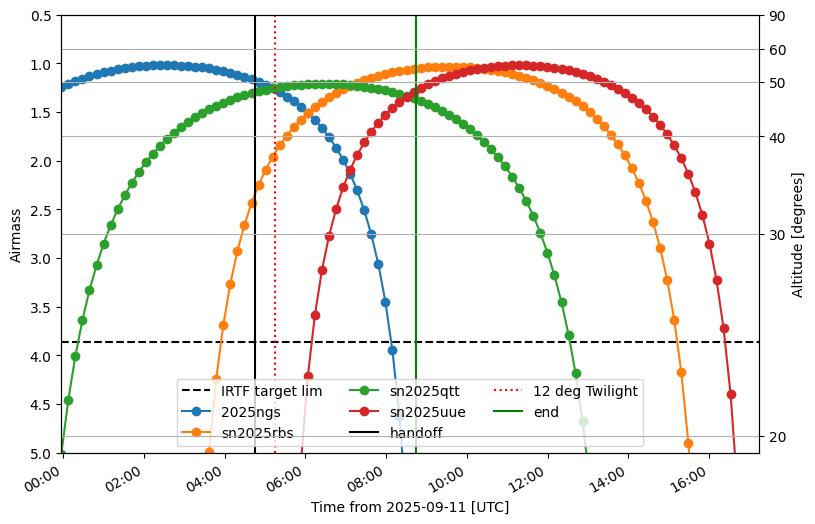

In [125]:
plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
#ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
ax.axhline(1/np.cos(((90-15)*u.degree).to(u.radian)), color='k', ls='--', label='IRTF target lim')

#ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim (new)')
time = today+np.linspace(-0.2, 0.52, 100)
# for std in chosen_stds:
#    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
#ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
#ax.axvline(twi18deg.plot_date, label='12deg', color='k')
#ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi12deg.plot_date, color='red', ls=':', label="12 deg Twilight")
#ax.axvline(twi12deg.plot_date, color='green', ls=":")
ax.axvline(night_end.plot_date, label='end', color='green')
#ax.axvline(12:25, color='green', ls=":")
#plt.axhline()
ax.legend(ncol=3, loc='lower center')
ax.set_ylim(5, 0.5)
plt.grid()
#plt.savefig('visibility1.pdf')

In [153]:
tab = """start  00:00:00 -90:00:00.0 99 5x300 
2025ngs   15:35:16.68 +30:51:55.5 18.0 14x120
HIP79332  16:11:28.74 +16:39:56.5 6.03 8x10
HIP91315  18:37:33.52 +62:31:35.7 5.7  8x10
2025qtt   19:31:06.01 +54:06:03.7 16.5 10x200
HIP109079 22:05:50.45 +45:06:45.0 6.6  8x10    
2025rbs   22:37:03.66 +34:25:08.0 14.0 6x200
HIP116886 23:41:33.51 +10:12:57.1 9.1  8x3
2025uue   00:20:05.08 +08:30:41.9 17.0 14x120
end       00:00:00    -90:00:00.0 99   1x1 """
#2025bco   13:15:43.30 -00:28:18.8 17.0 12x120
#HIP65599  13:26:58.94 +11:54:30.8 7.9  8x3 


In [154]:
# tab = """2023mut  04:48:34.34 +00:14:47.5 18.0 18x120    
# HIP22923 04:55:58.36 +05:23:56.6 6.5  2x4
# 2023zcu  06:01:06.84 -23:40:29.2 17.5 14x120
# HIP28520 06:01:13.10 -25:25:03.9 6.0  2x3
# 2023plg  07:17:03.16 +24:57:31.7 18.0 14x120
# HIP35345 07:18:04.09 +30:57:21.1 6.2  2x3
# HIP38722 07:55:39.89 +19:53:02.2 5.4  1x4
# 2023ufx  08:24:51.57 +21:17:43.3 18.5 24x120

# 2024bch  10:21:49.74 +56:55:40.4 14.5 8x200
# HIP53735 10:43:43.34 +57:11:57.1 5.8  8x6 
# HIP50303 10:16:14.43 +29:18:37.7 5.5  1x4
# 2024ehs  10:53:00.52 +17:34:21.5 16.0 12x200
# HIP56736 11:37:57.82 +15:46:36.9 8.8  2x120
# 2024gy   12:15:51.31 +13:06:56.1 15.0 10x200
# HIP65280 13:34:07.31 +55:20:54.3 5.60 1x56
# 2023ixf  14:03:38.56 +54:18:42.0 17.0 16x300 
# HIP77111 15:44:42.13 +17:15:51.2 6.15 1x56
# 2024cld  15:50:21.61 +18:56:21.1 16.0 12x200
# end        00:00:00    -90:00:00.0  99   1x1 """

In [155]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())
    
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [156]:
night_start = handoff
#night_start = Time(pre_twi15deg.iso)
#readout_time = 195*u.second
readout_time = 45*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)

In [157]:
tbdata['start'] = obs_start[:-1]

In [158]:
tbdata.write('../plan_20250807.txt', format='ascii.fixed_width', overwrite=True)

In [159]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,Time
start,00:00:00,-90:00:00.0,99,5x300,5.0,300.0,2025-09-12 04:45:00.000
2025ngs,15:35:16.68,+30:51:55.5,18.0,14x120,14.0,120.0,2025-09-12 05:18:00.000
HIP79332,16:11:28.74,+16:39:56.5,6.03,8x10,8.0,10.0,2025-09-12 06:00:45.000
HIP91315,18:37:33.52,+62:31:35.7,5.7,8x10,8.0,10.0,2025-09-12 06:12:20.000
2025qtt,19:31:06.01,+54:06:03.7,16.5,10x200,10.0,200.0,2025-09-12 06:23:55.000
HIP109079,22:05:50.45,+45:06:45.0,6.6,8x10,8.0,10.0,2025-09-12 07:09:00.000
2025rbs,22:37:03.66,+34:25:08.0,14.0,6x200,6.0,200.0,2025-09-12 07:20:35.000
HIP116886,23:41:33.51,+10:12:57.1,9.1,8x3,8.0,3.0,2025-09-12 07:49:20.000
2025uue,00:20:05.08,+08:30:41.9,17.0,14x120,14.0,120.0,2025-09-12 07:59:59.000


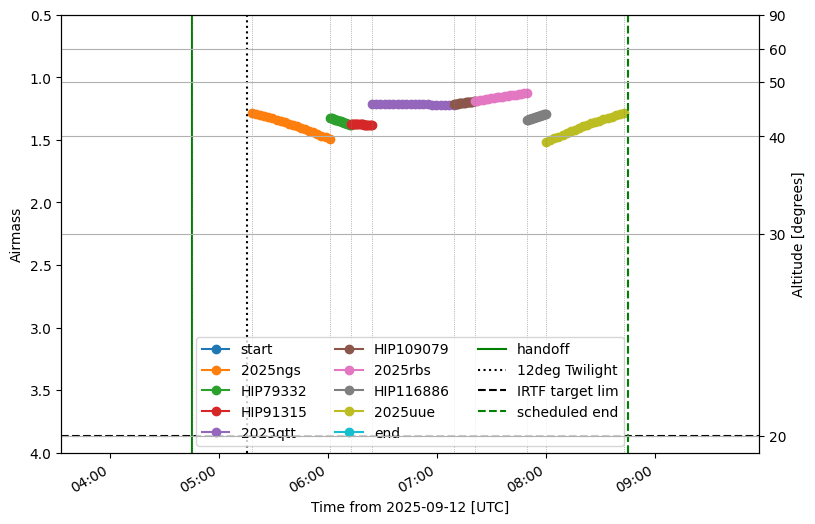

In [160]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
#ax.axhline(1/np.cos(((90-15)*u.degree).to(u.radian)), color='k', ls='--', label='IRTF target lim')
#ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='r', ls='--', label='Keck rising target lim (new)')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
#ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
#ax.axvline(twi18deg.plot_date, label='18deg', color='k')
#ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='green')
ax.axvline(pre_twi12deg.plot_date, color='k', ls=':', label="12deg Twilight")
ax.axhline(1/np.cos(((90-15)*u.degree).to(u.radian)), color='k', ls='--', label='IRTF target lim')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.axvline(night_end.plot_date, label='scheduled end', color='green', ls="--")
ax.legend(ncol=3, loc='lower center')


#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, night_end.plot_date+0.05)
#ax.set_ylim(ymax=0.95)
ax.set_ylim(2.0,0.95)
ax.set_ylim(4, 0.5)
plt.grid()
plt.savefig('schedule_IRTF_20250911.pdf')

In [161]:
s="""
#
#  IRTF Star Catalog User List version 3
#     This file contain a user's object list for the star catalog.
#     Observers can add their object in this file and input the list 
#     into the star catalog. 
#     All columns are delimited by spaces.
#
#     Format version 3 is supported from 2023B to present.
#
#     Ref: http://irtfweb.ifa.hawaii.edu/~tcs3/related/starcat/
#
#  Col  Name       Description
#  ---- --------   -----------------------------------------------------
#   1    Index     Numeric index of user list. 
#   2    Name      Name as a string (30 chars max). No spaces allowed. 
#   3    RA        RA  position in ICRS coordinates,  hh:mm:ss.ss. 
#   4    Dec       Dec position in ICRS coordinates, +dd:mm:ss.s.  
#   5    RA_PM     Proper motion of RA  in mas/yr. Use 0.0 if proper motion not known.
#   6    Dec_PM    Proper motion of Dec in mas/yr. Use 0.0 if proper motion not known.
#   7    ST        Spectra Type string (7 chars max). Use "n/a" if not known.
#   8&9  Magn_0    Magn_0 is Magnitude value and character description. Use '0.0 -' if not known.
#  10&11 Magn_1    Magn_1 is optional.  Will use '0.0 -' if not provided. 
#  12&13 Magn_2    Magn_2 is optional.  Will use '0.0 -' if not provided.
#  14&15 Magn_3    Magn_3 is optional.  Will use '0.0 -' if not provided.
#
#Index _________Name________   __ICRS_RA__  _ICRS_DEC__   RA_PM  Dec_PM   __ST___  Magn_0  Magn_1  Magn_2  Magn_3
#     30 chars max,no spaces   hh:mm:ss.ss  +dd:mm:ss.s   mas/y   mas/y  (7chars)  xx.x V  xx.x C  xx.x C  xx.x C
"""
all_targets['RA_PM']='n/a'
all_targets['DEC_PM']='n/a'
all_targets['ST']='n/a'
formats = '%+30s %+12.13s %+12.13s %+10s %+10s %+10s %+10s'
# headers = [format(str(x),y.replace('%+','>')) 
            #   for x, y in zip(all_targets[['target','ra','dec','epoch']].columns,formats.split())]
np.savetxt('starlist_%s.txt'%date, all_targets[['target','ra','dec','RA_PM','DEC_PM','ST','mag']].values, fmt=formats,header=s,comments='')

NameError: name 'all_targets' is not defined